<a href="https://colab.research.google.com/github/ronaldodeschain/rd_colab/blob/main/Clustering_Extraindo_Padroes_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Local dos dados: https://github.com/alura-cursos/alura-clustering-validation/tree/base-de-dados

In [21]:
import pandas as pd

dataframe = pd.read_csv("dados.csv")
dataframe.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
dataframe.shape

(8950, 18)

<h1>Começar a tratar os dados para o exercicio</h1> <br>
Pré processamento dos dados

In [23]:
#inplace é para definir que a mudança será efetivada no
#conjunto de dados sem precisar atribuir
dataframe.drop(columns=["CUST_ID","TENURE"],inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [24]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [25]:
dataframe.fillna(dataframe.median(),inplace=True)
#aqui transformando os not av em valores medianos


In [26]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [27]:
#Normalizando os dados
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred = kmeans.fit_predict(values)

<H1> Métricas de Avaliação </h1>
Internas: independe de labes<br>
compactação - Quão próximos estão os pontos em um mesmo cluster <br>
Separação - Quão bem separados estão os pontos em clusters diferentes<br>
ALPHA - distancia media entre o ponto e todos os outros pontos do mesmo cluster<br>
BETA - distância média entre o ponto e todos os outros pontos do cluster mais próximo.<br><br>
Coeficiente de Silhouette: s= b-a/max(a,b)<br><br>
Distancia Euclidiana: d(A,B) = RaizV (xB - xA)2 + (yB -yA)2

In [29]:
#chamar o silhouette no sklearn
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette)

0.36454411415175675


In [30]:
#índice Davies-Bouldin
#S - distancia media entre cada ponto do cluster e seu centróide
#ct - media de todos os pontos de um cluster
#quanto mais perto de 0 o resultado melhor
dbs = metrics.davies_bouldin_score(values,labels)
print(dbs)

1.0759640420985466


In [31]:
#matematica do Calinski-Harabasz
calinski = metrics.calinski_harabasz_score(values,labels)
print(calinski)

3431.7970107150363


In [32]:
#validação relativa
def clustering_algorithm(n_clusters,dataset):
    kmeans = KMeans(n_clusters=n_clusters,n_init=10,max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset,labels,metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset,labels)
    calinski = metrics.calinski_harabasz_score(dataset,labels)
    return s,dbs,calinski

In [33]:
s1,dbs1,calinski1 = clustering_algorithm(3,values)
print(s1,dbs1,calinski1)

0.3271751306897884 1.3102638818385068 3526.456164575466


In [34]:
s1,dbs1,calinski1 = clustering_algorithm(5,values)
print(s1,dbs1,calinski1)

0.36454314826693845 1.075812734747931 3431.800540734652


In [35]:
s1,dbs1,calinski1 = clustering_algorithm(10,values)
print(s1,dbs1,calinski1)

0.3515270276944651 1.1153052525476261 3019.1732122502763


In [36]:
#conjunto aleatorio de dados
import numpy as np
random_data = np.random.rand(8950,16)
s,dbs,calinski = clustering_algorithm(5,random_data)
print(s,dbs,calinski)
print(s1,dbs1,calinski1)

0.039390135489853456 3.5098353635334205 302.8089765282578
0.3515270276944651 1.1153052525476261 3019.1732122502763


In [37]:
#dividr a base de dados
set1,set2,set3 = np.array_split(values,3)
s1,dbs1,calinski1 = clustering_algorithm(5,set1)
s2,dbs2,calinski2 = clustering_algorithm(5,set2)
s3,dbs3,calinski3 = clustering_algorithm(5,set3)
print(s1,dbs1,calinski1)
print(s2,dbs2,calinski2)
print(s3,dbs3,calinski3)
#evidenciando que o cluster é válido

0.36897094584161894 1.0581656052369077 1204.0560966145404
0.35406999696241026 1.1389554530299943 1194.9454119497243
0.3669338522621966 1.0987322533743504 1167.5348185515054


<function matplotlib.pyplot.show(close=None, block=None)>

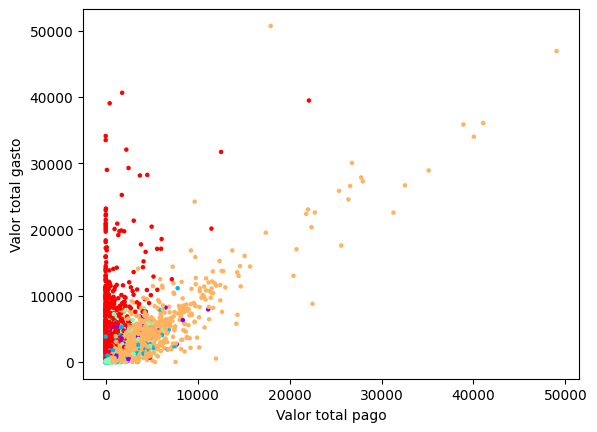

In [38]:
#grafico com purchases e payment
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'],dataframe['PAYMENTS'], c=labels,s=5,cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

In [41]:
#import seaborn as sns
#dataframe["cluster"] = labels
#sns.pairplot(dataframe[0:], hue="cluster")

In [42]:
#dados estatisticos
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         411.0  1987.501586  1854.459156  70.794108  1018.958891   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4        1074.0  1794.443291  1981.773996   0.000000   507.348768   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1337.287314  2138.678431  11670.179850             411.0  0.989486   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2          82.941478   410.126095   9630.367575            3280.0  0.774389   
3         554.332740  1370.859355  19043.138560            1536.0  0.928220   
4        1087.920500  2312.923253  14581.459140            1074.0  0.862388   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7112.618584  76406.207520            411.0  0.019318   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       248.733727   4483.503862           3280.0  0.246806   
3        ...       524.184580  18621.013310           1536.0  0.278331   
4        ...       883.991828  21235.065300           1074.0  0.117321   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.090901  0.0  0.0  0.000000  0.000000  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.346748  0.0  0.0  0.000000  0.444444  1.0  
3        0.367137  0.0  0.0  0.083333  0.545455  1.0  
4        0.186720  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [45]:
centroids = kmeans.cluster_centers_
print(centroids)

[[3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [1.60024706e-01 2.45463238e-04 4.38782328e-01 2.57144577e-01
  1.81809709e-01 2.53743879e-02 2.04517615e-04 8.90287035e-05
  1.50743855e-04 9.35680559e-06 1.69153111e-04 6.17796821e-03
  6.03613847e-01 4.02560302e-01 8.55015664e-02 7.20337923e-05]
 [2.

In [50]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


BALANCE
0.0224 <br>
PURCHASES
0.0197 <br>
CASH_ADVANCE
0.0225 <br>
CREDIT_LIMIT
0.0360 <br>
PAYMENTS
0.0279 <br>

In [57]:
description = dataframe.groupby('cluster')[['BALANCE', 'PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
2,443.746756,629.249107,141.482978,5130.547795,814.294226,3280
3,1142.514535,3274.126719,181.727235,4096.718849,3036.609179,1536
4,1794.443291,478.411620,3266.686592,3983.399639,4712.044614,1074


In [58]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
3,1536.0,0.278331,0.367137,0.0,0.0,0.083333,0.545455,1.0
4,1074.0,0.117321,0.186720,0.0,0.0,0.083333,0.142857,1.0
